Michael Hotaling<br>2/9/2020<br>DSC540
# Week 9/10 Assignment 

# 1. Extracting the Top 100 eBooks from Gutenberg

Project Gutenberg encourages the creation and distribution of eBooks by encouraging volunteer efforts to digitize and archive cultural works. This activity aims to scrape the URL of Project Gutenberg's Top 100 eBooks to identify the eBooks' links. It uses BeautifulSoup4 to parse the HTML and regular expression code to identity the Top 100 eBook file names.

1) Import the necessary libaries, uncluding regex and BeautifulSoup

In [1]:
# Loading the libraries I'll need for the whole assignment
import re
from bs4 import BeautifulSoup
from urllib.error import HTTPError
import requests
import ssl
import matplotlib.pyplot as plt

2) Check the SSL certificate

In [2]:
ctx = ssl.create_default_context()
ctx.check_hostname=False
ctx.verify_mode = ssl.CERT_NONE

3) Read the HTML from the URL

In [3]:
# Set URL and get a response.
url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(url)

4) Write a small function to check the status of the web request

In [4]:
def status_checker(response):
    '''Raises an error if the status code of a request is not 200'''
    if response.status_code == 200:
        pass
    else:
        raise HTTPError(response.url, response.status_code,'Website cannot be reached','','')
status_checker(response)

5) Decode the response and pass this on to BeautifulSoup for HTML parsing

In [5]:
# Assigning a BS object for the response
bs = BeautifulSoup(response.text)

6) Find all the **href** tags and store them in the list of links. Check what the list looks like - print the first 30 elements

In [6]:
# Using list comprehension to get all the links
links = [i.get('href') for i in bs.find_all('a')]

In [7]:
print(links[30:60])

['#authors-last7', '#books-last30', '#authors-last30', '/ebooks/84', '/ebooks/1342', '/ebooks/1080', '/ebooks/46', '/ebooks/844', '/ebooks/25344', '/ebooks/1952', '/ebooks/815', '/ebooks/2542', '/ebooks/11', '/ebooks/5200', '/ebooks/43', '/ebooks/98', '/ebooks/1250', '/ebooks/1260', '/ebooks/76', '/ebooks/174', '/ebooks/1661', '/ebooks/408', '/ebooks/219', '/ebooks/1400', '/ebooks/160', '/ebooks/2701', '/ebooks/23', '/ebooks/16328', '/ebooks/64317', '/ebooks/1232']


7) Use a regular expression to find the numeric digits of these links. These are the file numbers for the top 100 ebooks

8) Initalize an empty list to hold the file numbers over an appropriate range and use **regex** to find the numeric digits in the link **href** string. Use the **findall** method.

In [8]:
# Assinging an empty list to store book numbers in
book_nums = []

# Iterating over all the links to find values that contain /ebooks/ and extracting the number from them
for i in links:
    if i[0:8] == '/ebooks/':
        # Using regex to extract only numbers
        n = re.findall('[0-9]+', i)
        if n:
            # If the value is not empty, add it to the list
            book_nums.append(n[0])
print(book_nums)

['84', '1342', '1080', '46', '844', '25344', '1952', '815', '2542', '11', '5200', '43', '98', '1250', '1260', '76', '174', '1661', '408', '219', '1400', '160', '2701', '23', '16328', '64317', '1232', '205', '2852', '74', '345', '55', '16', '215', '6133', '120', '64504', '64505', '2814', '1497', '902', '19942', '3825', '64506', '17748', '514', '2591', '4300', '3207', '64497', '244', '203', '15399', '2600', '768', '158', '4517', '64507', '20203', '2554', '7370', '2097', '996', '45', '36', '1184', '57775', '140', '1727', '58585', '42324', '1001', '2500', '113', '42108', '3600', '43453', '105', '730', '829', '135', '5740', '1934', '779', '6130', '851', '1064', '25929', '1998', '61', '11030', '161', '45502', '22120', '35', '64494', '209', '41', '64510', '766', '84', '1342', '1080', '46', '11', '1952', '25344', '98', '844', '2542', '43', '5200', '1250', '1260', '1661', '76', '2701', '174', '408', '219', '16328', '1400', '160', '23', '74', '6133', '2852', '205', '345', '1232', '64317', '120',

9) What does the **soup** object's text look like? Use the **.text** method and print only the first 2,000 characters. (do not print the whole thing, as it is too long)

In [9]:
bs.text[0:2000]

"\n\n\nTop 100 | Project Gutenberg\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMenu▾\n\n\n\nAbout\n          ▾\n\n▾\n\n\nAbout Project Gutenberg\nCollection Development\nContact Us\nHistory & Philosophy\nPermissions & License\nPrivacy Policy\nTerms of Use\n\n\n\nSearch and Browse\n      \t  ▾\n\n▾\n\n\nBook Search\nBookshelves\nFrequently Downloaded\nOffline Catalogs\n\n\n\nHelp\n          ▾\n\n▾\n\n\nAll help topics →\nCopyright Procedures\nErrata, Fixes and Bug Reports\nFile Formats\nFrequently Asked Questions\nPolicies →\nPublic Domain eBook Submission\nSubmitting Your Own Work\nTablets, Phones and eReaders\nThe Attic →\n\n\nDonate\n\n\n\n\n\n\n\n\n\n\nDonation\n\n\n\n\n\n\n\nFrequently Viewed or Downloaded\nThese listings are based on the number of times each eBook gets downloaded.\n      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not coun

10) Search in the extracted text (using a regular expression) from the soup object to find the names of the top 100 eBooks (yesterday's rankings)

11) Create a starting index. It should point at tht text *Top 100 EBooks yesterday.* Use the **splitlines** method of soup.text. It splits the lines of text of the soup object.

12) Loop 1-100 to add the strings of the next 100 lines to this temporary list. Hint: use the **splitlines** method.


In [10]:
# Finding the index for Top 100 Ebooks Yesterday
index_start = bs.text.splitlines().index('Top 100 EBooks yesterday')

# List comprehension to iterate over books
titles = [i for i in bs.text.splitlines()[index_start+1: index_start + 110]]
titles = titles[9:110]
titles

['Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (4688)',
 'Pride and Prejudice by Jane Austen (3170)',
 'A Modest Proposal by Jonathan Swift (1758)',
 'A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens (1449)',
 'The Importance of Being Earnest: A Trivial Comedy for Serious People by Oscar Wilde (1386)',
 'The Scarlet Letter by Nathaniel Hawthorne (1353)',
 'The Yellow Wallpaper by Charlotte Perkins Gilman (1332)',
 'Democracy in America — Volume 1 by Alexis de Tocqueville (1316)',
 'Et dukkehjem. English by Henrik Ibsen (1246)',
 "Alice's Adventures in Wonderland by Lewis Carroll (1222)",
 'Metamorphosis by Franz Kafka (1217)',
 'The Strange Case of Dr. Jekyll and Mr. Hyde by Robert Louis Stevenson (1165)',
 'A Tale of Two Cities by Charles Dickens (1163)',
 'Anthem by Ayn Rand (1070)',
 'Jane Eyre: An Autobiography by Charlotte Brontë (984)',
 'Adventures of Huckleberry Finn by Mark Twain (983)',
 'The Picture of Dorian Gray by O

13) Use a regular expression to extract only text from the name strings and append it to an empty list. Use **match** and **span** to find the indices and use them.

In [11]:
# List comprehension to remove all the numbers
[re.sub("[^a-zA-Z]+", " ", i)[:-1] for i in titles]

['Frankenstein Or The Modern Prometheus by Mary Wollstonecraft Shelley',
 'Pride and Prejudice by Jane Austen',
 'A Modest Proposal by Jonathan Swift',
 'A Christmas Carol in Prose Being a Ghost Story of Christmas by Charles Dickens',
 'The Importance of Being Earnest A Trivial Comedy for Serious People by Oscar Wilde',
 'The Scarlet Letter by Nathaniel Hawthorne',
 'The Yellow Wallpaper by Charlotte Perkins Gilman',
 'Democracy in America Volume by Alexis de Tocqueville',
 'Et dukkehjem English by Henrik Ibsen',
 'Alice s Adventures in Wonderland by Lewis Carroll',
 'Metamorphosis by Franz Kafka',
 'The Strange Case of Dr Jekyll and Mr Hyde by Robert Louis Stevenson',
 'A Tale of Two Cities by Charles Dickens',
 'Anthem by Ayn Rand',
 'Jane Eyre An Autobiography by Charlotte Bront',
 'Adventures of Huckleberry Finn by Mark Twain',
 'The Picture of Dorian Gray by Oscar Wilde',
 'The Adventures of Sherlock Holmes by Arthur Conan Doyle',
 'The Souls of Black Folk by W E B Du Bois',
 'Hea

# 2. Building Your Own Movie Database by Reading an API

In this activity, you will build a complete movie database by communicating and interfacing with a free API. You will learn about obtaining a unique user key that must be used when your program tries to access the API. This activity will teach you general chapters about working with an API, which are fairly common for other highly popular API services such as Google or Twitter. Therefore, after doing this exercise, you will be confident about writing more complex programs to scrape data from such services

1) Import urllib.request, urllib.parse, urllib, error and json

In [12]:
import urllib
from urllib import request, parse, error
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

2) Load the secret API key from a JSON file stored in the same folder in a varaibe by using **json.loads**

3) Obtain a key and store it in JSON as **APIkeys.json**

4) Open the **APIkeys.json** file

In [13]:
# Loading the API key from the JSON
with open('APIkeys.json') as f:
    key = json.load(f)['apikey']

5) Assign the OMDb portal (http://www.omdbapi.com/?) as a string to a variable

In [14]:
# Assigning the url
url = 'http://www.omdbapi.com/?'

6) Create a variable called **apikey** with the last portion of the URL. **(&apikey = secretapikey)**, where **secretapikey** is your own API key

In [15]:
# Creating the apikey string
apikey = "&apikey="+key

7)  Write a utility function called **print_json** to print the movie data from a JSON file (which we will get from the portal)

In [16]:
def print_json(data):
    keys = ['Title','Year','Rated','Released','Runtime','Genre','Director','Writer','Actors','Plot','Language','Country','Awards','Metascore','imdbRating','imdbVotes','imdbID']
    for k in keys:
        print(f"{k}: {data[k]}")

8) Write a utility function to download a poster of the movie based on the information from the JSON dataset and save it in your local folder. Use the os module. The poster data is stored in the JSON key **Poster**. Use the Python command to open a file and write the poster data. Close the file after you're done. This function will save the poster as an image.

In [17]:
def save_poster(data):
    '''Takes in a JSON object, finds the poster value assigned to the Poster key, downloads it with the title, and shows it'''
    poster_url = data['Poster']
    save_title = re.sub('[^A-Za-z0-9]+', '', data['Title'])
    urllib.request.urlretrieve(poster_url, f"{save_title}.jpg")
    img = mpimg.imread(f"{save_title}.jpg")
    plt.figure(figsize=(9,16))
    plt.imshow(img)

9) Write a utility function called **search_movie** to search for a movie by its name, print the downloaded **JSON** data, and save the movie poster in the local folder. Use a **try-except** lop for this. Use the previously created **serviceurl** and  **apikey** variables. You have to pass on a dictionary with a key, t, and the movie name as the corresponding value to the **urllib.parse.urlencode()** function and then add the **serviceurl** and **apikey** to the output of the function to construct the full URL. The **JSON** data has a key called **Response**. If it is **True**, that means the read was successful.  Check this before processing the data. If it’s not successful, then print the **JSON** key Error, which will contain the appropriate error message returned by the movie database.

In [18]:
def search_movie(movie):
    '''Takes in a string and returns information about the movie as well as the poster assigned to it'''
    # Loading the API key from the JSON
    url = 'http://www.omdbapi.com/?'
    with open('APIkeys.json') as f:
        key = json.load(f)['apikey']
    apikey = "&apikey="+key
    
    search_url = url + f"t={movie}"+apikey
    response = requests.get(search_url)
    data = response.json()
    try:
        if data['Response'] == "True":
            print_json(data)
            save_poster(data)
        else:
            print(f"Error Code {response.status_code}: {data['Error']}")
            
    except ValueError or HTTPError:
        print("Unable to find poster")

10) Test the **search movie** function by entering *Titanic*

Select a Movie: Titanic
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: USA, Mexico
Awards: Won 11 Oscars. Another 112 wins & 83 nominations.
Metascore: 75
imdbRating: 7.8
imdbVotes: 1,042,391
imdbID: tt0120338


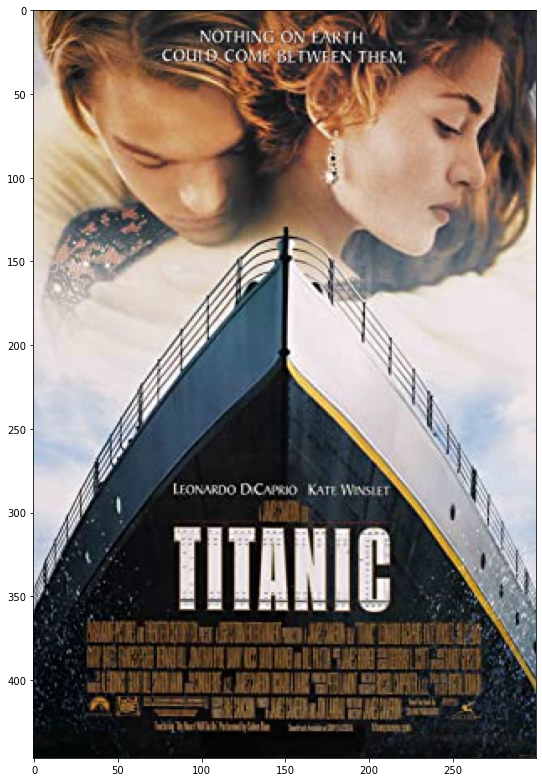

In [19]:
search_movie(input("Select a Movie: "))

11) Test the **search_movie** function by entering *Random_error* (obviously, this will not be found, and you should be able to check whether your error catching code is working properly)

In [20]:
search_movie(input("Select a Movie: "))

Select a Movie: Random_error
Error Code 200: Movie not found!


# 3: Connect to the Twitter API and do a simple data pull
### Importing basic libraries and the data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy as tw
import json
import re
from bs4 import BeautifulSoup

Adding login parameters 

In [22]:
# Loading login parameters

with open('twitter_auth.json') as f:
    auth = json.load(f)
    consumer_key = auth['consumer_key']
    consumer_secret = auth['consumer_key_secret']
    access_token = auth['access_key']
    access_token_secret = auth['access_key_secret']

In [23]:
# Logging into Twitter through the tweepy package

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tw.API(auth)

In [24]:
# Define the search term and the date_since date as variables
search_words = input("Select a Search Topic: ")
date_since = "2018-11-16"

# Add some other conditions like removing retweets and searching for verified only accounts
new_search = search_words + " -filter:retweets"# + " filter:verified"

Select a Search Topic: Football


In [25]:
# Retrieving the results from our search

tweets = tw.Cursor(api.search,
                       q=new_search,
                       lang="en",
                       since=date_since).items(50)

In [26]:
# Add the results to a dataframe
data = [[tweet.created_at, tweet.user.screen_name, tweet.text,tweet.favorite_count, tweet.retweet_count] for tweet in tweets]
tweet_text = pd.DataFrame(data=data, 
                    columns=['created_at','user','text','likes','retweets'])
tweet_text.head(10)

,created_at,user,text,likes,retweets
0,2021-02-10 17:01:29,ArthurIvory1,@GraysonSmith77 @UnderArmour @therealkwat @tra...,0,0
1,2021-02-10 17:01:29,ThodayDesigns,Even though they play just the same football I...,0,0
2,2021-02-10 17:01:29,sadnygfan,@TFG_Football It's the picks and the contract ...,0,0
3,2021-02-10 17:01:26,Jimmilaw,@AtownColm @CelticFC Wait till next season and...,0,0
4,2021-02-10 17:01:26,AmbroseFord2,@NFLObjectors @GregRansom Follow the money. Th...,0,0
5,2021-02-10 17:01:25,FootballPolls_9,@NUFC Follow me for football polls 😁,0,0
6,2021-02-10 17:01:23,SelecaoTalk,@_camaza Kaka isn’t clear at all. Pure revisio...,1,0
7,2021-02-10 17:01:23,suribepe,@TFG_Football I’m ok with my Chargers moving o...,0,0
8,2021-02-10 17:01:23,Clay__v2,@MUTdonationsPLZ @mondez89 @Mitch4DPOY @Sports...,0,0
9,2021-02-10 17:01:21,19andonfire,starting to think i havent know the triumphs a...,0,0


# 4. Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. 

    a. Line
    b. Scatter
    c. Bar
    d. Histogram
    e. Density Plot
    f. Pie Chart

In [27]:
met = pd.read_csv("MetObjects.csv", low_memory=False)
print(met.dtypes)
met.head(4)

Object Number               object
Is Highlight                  bool
Is Timeline Work              bool
Is Public Domain              bool
Object ID                    int64
Gallery Number              object
Department                  object
AccessionYear               object
Object Name                 object
Title                       object
Culture                     object
Period                      object
Dynasty                     object
Reign                       object
Portfolio                   object
Constiuent ID               object
Artist Role                 object
Artist Prefix               object
Artist Display Name         object
Artist Display Bio          object
Artist Suffix               object
Artist Alpha Sort           object
Artist Nationality          object
Artist Begin Date           object
Artist End Date             object
Artist Gender               object
Artist ULAN URL             object
Artist Wikidata URL         object
Object Date         

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979,Coin,One-dollar Liberty Head Coin,...,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,...,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


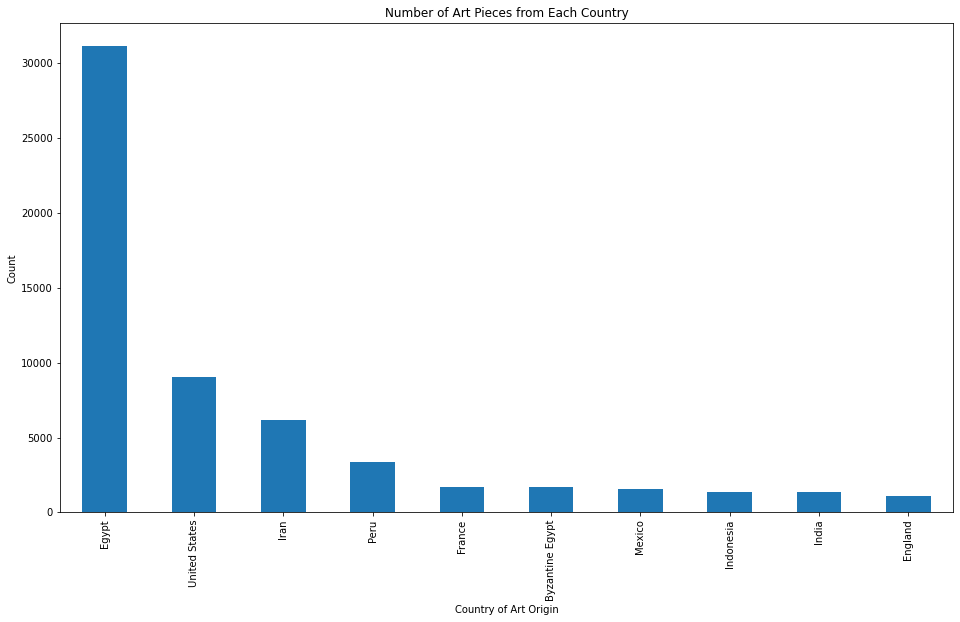

In [28]:
plt.figure(figsize = (16,9))
met['Country'].value_counts().head(10).plot(kind='bar')
plt.xlabel("Country of Art Origin")
plt.ylabel("Count")
plt.title("Number of Art Pieces from Each Country")
plt.show()

Text(0.5, 1.0, 'Pie Chart of Art Mediums')

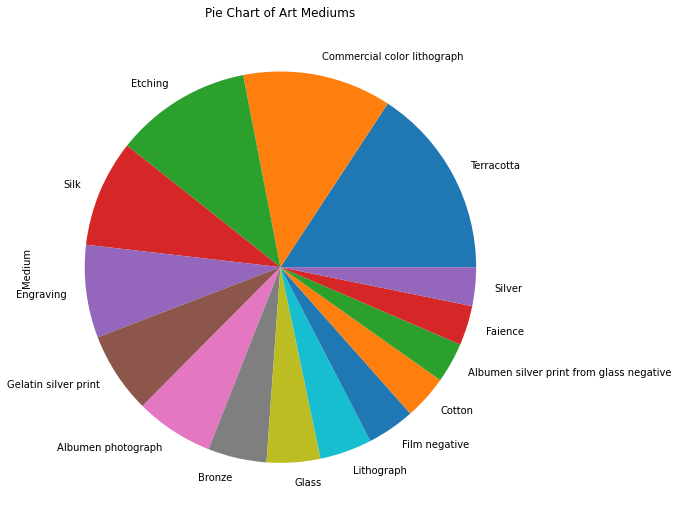

In [29]:
plt.figure(figsize = (16,9))
met['Medium'].str.capitalize().value_counts().head(15).plot(kind='pie')
plt.title("Pie Chart of Art Mediums")

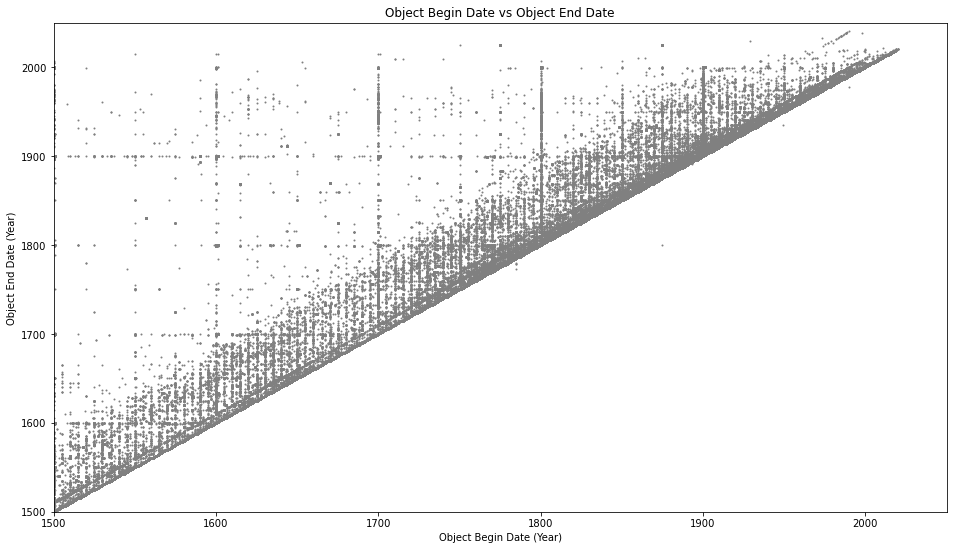

In [30]:
plt.figure(figsize=(16,9))
plt.scatter(met['Object Begin Date'], met['Object End Date'], color = "grey", s = 1)
plt.xlim(1500, 2050)
plt.ylim(1500,2050)
plt.xlabel("Object Begin Date (Year)")
plt.ylabel("Object End Date (Year)")
plt.title("Object Begin Date vs Object End Date")
plt.show()